<a href="https://colab.research.google.com/github/Tha-Helena/Analise_de_Dados_Airbnb_Buenos_Aires/blob/main/Projeto_01_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Buenos Aires*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa desde 2008.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Buenos Aires, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-04-26/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Com isso, vamos ao projeto

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2022-12-29/visualisations/listings.csv")

## Análise dos Dados

Vamos começar com um dicionário para facilitar o entendimento dos dados usados na análise

**Dicionário das variáveis**

* `id` - Número gerado para identificação do imóvel
* `name` - Nome do imóvel anunciado 
* `host_id` - Número de identificação do proprietário (anfitrião) do imóvel
* `host_name` - Nome do anfitrião
* `neighbourhood_group` -  esta coluna não contém nenhum valor válido
* `neighbourhood` - Nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - Tipo de lugar que está disponível para aluguel
* `price` - Preço da diária para o aluguel do imóvel
* `minimim_nights` - Quantidade mínima de noites para efetuar a reserva
* `number_of_reviews` - Número de avaliações que o proprietário possui 
* `last_review` - Data da última avaliação
* `reviews_per_month` - Quantidade de avaliações por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Disponibilidade para aluguel dentro de 365 dias
* `number_of_reviews_ltm` - Número de avaliações dos últimos 12 meses
* `license` - Registro comercial que o anfitrião faz junto ao governo local (Esse registro só é obrigatório em algumas jurisdições)



Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras e as 5 últimas entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,21143,3,33,2022-12-19,0.26,1,309,6,NaN
1,14222,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",87710233,María,NaN,Palermo,-34.58617,-58.41036,Entire home/apt,5728,7,102,2022-12-05,0.80,4,305,11,NaN
2,317484,Single Room in Palermo Soho,1621752,Luba,NaN,Palermo,-34.58992,-58.42236,Private room,3348,2,160,2022-12-10,1.22,4,349,5,NaN
3,15074,ROOM WITH RIVER SIGHT,59338,Monica,NaN,Nuñez,-34.53892,-58.46599,Private room,5286,29,0,NaN,NaN,1,365,0,NaN
4,118070,Amazing view - GREAT Studio - Balcony,530261,Luciano,NaN,Palermo,-34.58311,-58.42767,Entire home/apt,10572,14,49,2022-07-22,0.36,27,349,4,NaN


In [ ]:
# mostrar as 5 últimas entradas
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
20080,789876010794026163,Mono ambiente vista panorámica,161559109,Juan,NaN,Caballito,-34.608729,-58.460363,Entire home/apt,6080,1,0,NaN,NaN,18,331,0,NaN
20081,791445322793116711,Departamento recoleta amplio.,154496179,Ramiro,NaN,Recoleta,-34.590495,-58.400738,Entire home/apt,7048,3,0,NaN,NaN,1,364,0,NaN
20082,789883094728711215,Palermo Ápt bohemia,60115955,Hache,NaN,Palermo,-34.584193,-58.440578,Entire home/apt,2114,4,0,NaN,NaN,15,342,0,NaN
20083,789886886364996844,Departamento en Congreso de Buenos Aires + coch,119161621,Camila,NaN,Monserrat,-34.610114,-58.390820,Entire home/apt,10500,2,0,NaN,NaN,1,339,0,NaN
20084,789889818985355570,Dulce hogar Belgrano R,48005753,Federico,NaN,Belgrano,-34.561013,-58.463017,Entire home/apt,9867,2,0,NaN,NaN,2,90,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Aqui identificamos a quantidade de entradas e os tipos de colunas que a nossa base de dados possui.

O *dataset* usado nessa análise é uma versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com mais entradas e variáveis (`listings.csv.gz`).

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 20085
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Identificamos a qualidade de um *dataset* através da quantidade de valores ausentes.

* Foi indentificado que a coluna `neighbourhood_group` possui 100% dos seus valores ausentes.
* A coluna `license` está com 97% dos seus valores ausentes, possivelmente esse registro não é obrigatória em Buenos Aires.
* As variáveis `reviews_per_month` e `last_review` possuem cerca de 19% dos seu valores ausentes.
* Na coluna `name` temos uma pequena quantidade de valores ausentes, aproximadamente 0,01%.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.979437
reviews_per_month                 0.190739
last_review                       0.190739
name                              0.000149
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Agora iremos gerar um histograma para melhor visualização das variáveis.

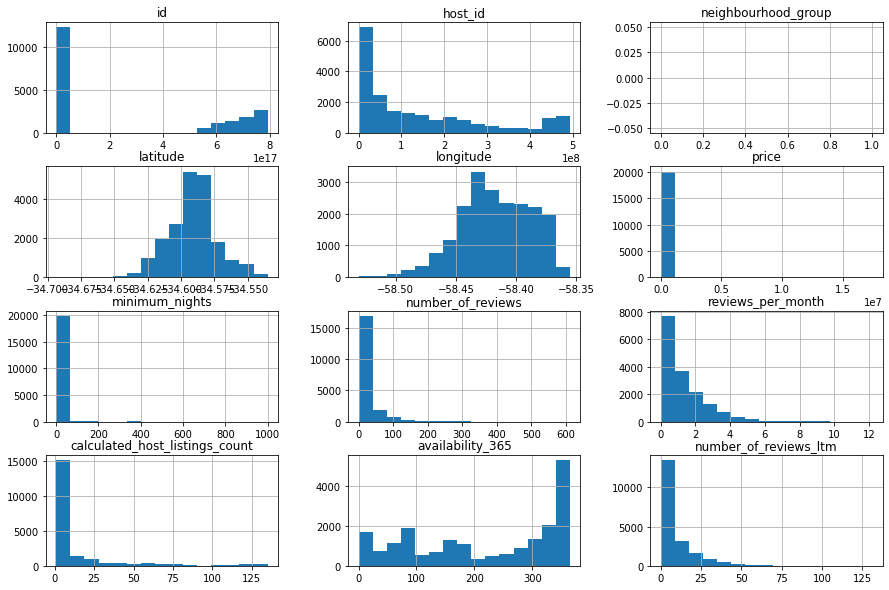

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q3.1. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
     'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.008500e+04,20085.000000,20085.000000,16254.000000,20085.000000,20085.000000
mean,1.644369e+04,7.208564,21.916604,1.313682,13.073189,217.271098
std,1.915379e+05,28.313061,38.478268,1.324499,26.460109,127.390298
min,2.600000e+02,1.000000,0.000000,0.010000,1.000000,0.000000
25%,5.638000e+03,2.000000,1.000000,0.330000,1.000000,89.000000
50%,7.953000e+03,3.000000,8.000000,0.910000,2.000000,246.000000
75%,1.233400e+04,5.000000,25.000000,1.920000,9.000000,343.000000
max,1.744311e+07,1000.000000,612.000000,12.170000,135.000000,365.000000


Analisando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* Acoluna `calculated_host_listings_count` possui 75% do valor abaixo de 9.000000, e o seu valor máximo é de 135.000000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

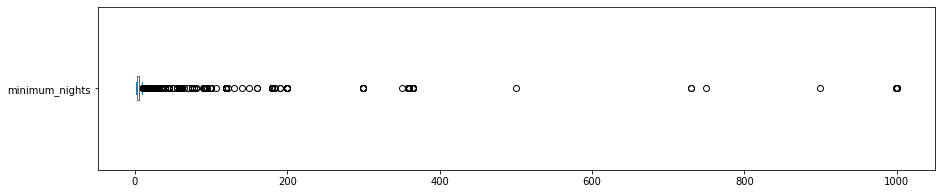

minimum_nights: valores acima de 30:
371 entradas
1.8471%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para calculated_host_listings_count

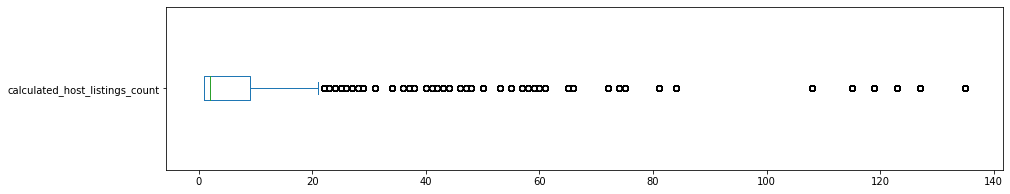


calculated_host_listings_count: valores acima de 60.000000
1305 entradas
6.4974%


In [ ]:
# calculated_host_listings_count
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 60.000000 para calculated_host_listings_count
print("\ncalculated_host_listings_count: valores acima de 60.000000")
print("{} entradas".format(len(df[df.calculated_host_listings_count > 60.000000])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > 60.000000]) / df.shape[0])*100))


#### Boxplot para price

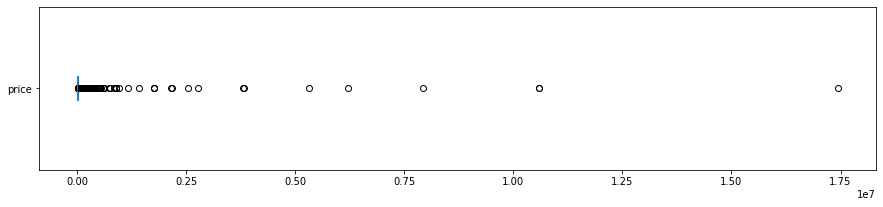


price: valores acima de 20000
1933 entradas
9.6241%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 20000 para price
print("\nprice: valores acima de 20000")
print("{} entradas".format(len(df[df.price > 20000])))
print("{:.4f}%".format((len(df[df.price > 20000]) / df.shape[0])*100))


#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `calculated_host_listings_count` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

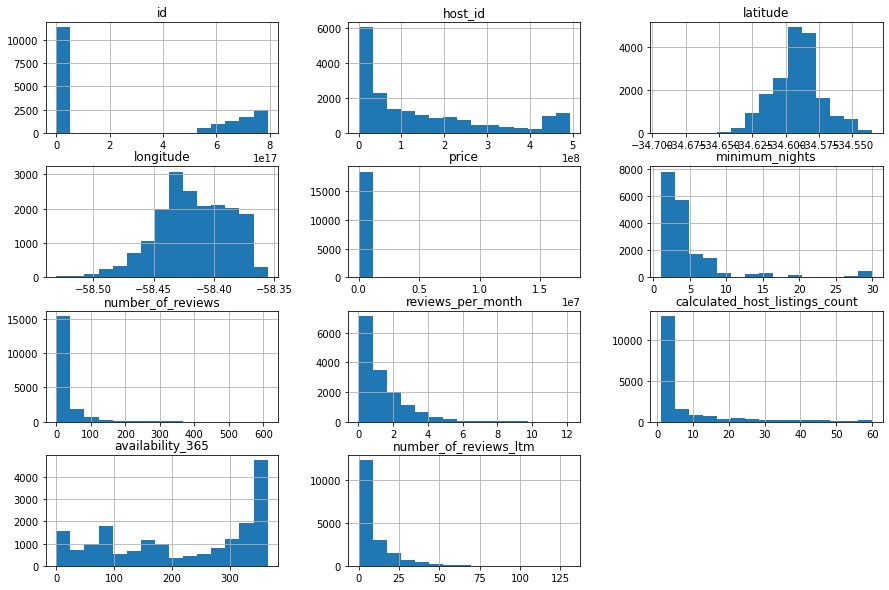

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 60.000000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Aqui fizemos uma média de preço das diárias para locação.

In [ ]:
# ver a média da coluna `price``
df.price.mean()

16443.69146128952

### **Q4. Qual a correlação existente entre as variáveis**


Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.076329,-0.024419,0.004855,0.158788,0.089827
minimum_nights,-0.076329,1.000000,-0.108661,-0.258510,0.023746,-0.024730
number_of_reviews,-0.024419,-0.108661,1.000000,0.260080,-0.054137,-0.055242
reviews_per_month,0.004855,-0.258510,0.260080,1.000000,0.083311,0.085927
calculated_host_listings_count,0.158788,0.023746,-0.054137,0.083311,1.000000,0.010065
availability_365,0.089827,-0.024730,-0.055242,0.085927,0.010065,1.000000


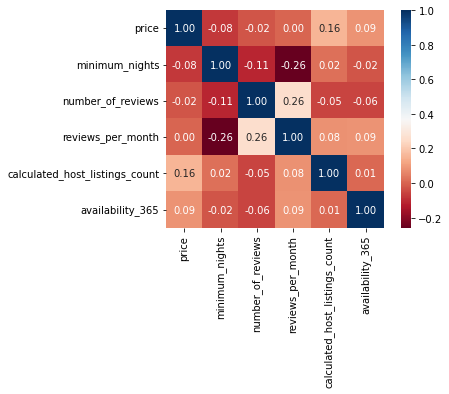

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    15750
Private room        1831
Shared room          149
Hotel room            85
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.884086
Private room       0.102779
Shared room        0.008364
Hotel room         0.004771
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Puerto Madero    14150.587786
Palermo           9510.999149
Recoleta          8768.970717
Belgrano          8722.916479
Nuñez             8699.107050
Retiro            8356.761457
Colegiales        8047.479218
Barracas          8028.221374
Villa Devoto      7933.600000
San Telmo         7794.799220
Name: price, dtype: float64

Acima, podemos ver que os bairros Puerto Madero, Palermo, Recoleta e Belgrano, são os bairros com maior valor para locação e também são os bairros mais nobres em Buenos Aires. 


In [ ]:
# ver quantidade de imóveis no Puerto Madero
print(df_clean[df_clean.neighbourhood == "Puerto Madero"].shape)

# ver as 5 entradas do Puerto Madero
df_clean[df_clean.neighbourhood == "Puerto Madero"].head()

(248, 17)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
136,396509,Suite at Faena Hotel Puerto Madero,1443812,Luciana,Puerto Madero,-34.61254,-58.36241,Entire home/apt,26025,1,89,2022-12-19,0.92,2,109,59,NaN
209,104343,Luxury Faena Hotel Penthouse Suite with River ...,542973,Stay,Puerto Madero,-34.60220,-58.35541,Hotel room,43671,1,180,2022-12-11,1.34,1,338,31,NaN
404,699486,Studio @ Puerto Madero Buenos Aires,719967,Nicolas,Puerto Madero,-34.62021,-58.36015,Entire home/apt,7048,5,26,2021-06-24,0.24,1,261,0,NaN
779,1993035,STYLISH CONDO IN TOP BUILDING,8904846,Claudio,Puerto Madero,-34.61014,-58.36221,Entire home/apt,18737,14,11,2022-05-01,0.10,1,358,1,NaN
854,2059189,"Apartment puerto madero, buenos aires city",908033,Heidi,Puerto Madero,-34.61912,-58.36120,Entire home/apt,12334,1,13,2020-03-18,0.12,1,146,0,NaN


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

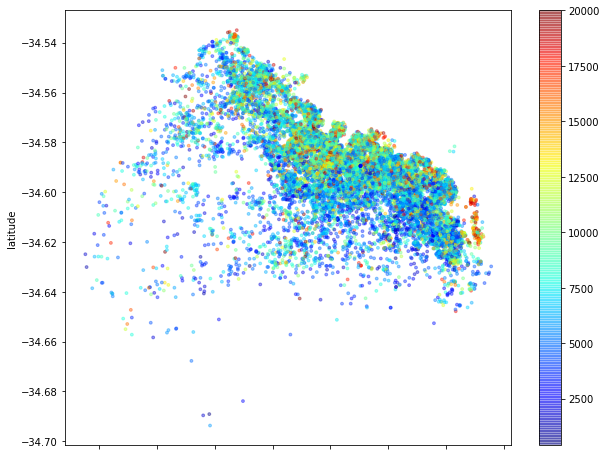

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(10,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Aqui vamos verificar a quantidade média de noites alugada pelos hospedes. 

In [ ]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

7.208563604680109

## Conclusões


Essa análise foi feita de forma superficial com a base de dados fornecida pela plataforma online do Airbnb, onde foi possível observar que existem *outliers* em algumas variáveis.

* Também observamos que os imóveis nos bairros mais nobres de Buenos Aires são os com maior valor de aluguel.

* A procura para locação de casa inteira / apartamento inteiro é de 88% e quarto privativo 10%.

* A média de preço da diária é de R$ 443,89 / ARS 16443.69146128952.

* A média reservada pelos hospedes é de 7 diárias.

Por fim, lembra-se que este *dataset* é uma versão resumida, apenas para uma pesquisa inicial. Para uma próxima análise é recomendado que a base de dados seja a mais completa `listings.csv.gz` e assim podemos chegar a uma conclusão com mais propriedade das informações.


